# Exploratory Data Analysis

## Set up

In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
file_path_1 = "/home/jupyter/CPSC 368/DB-Research-Project/data/cleaned/california.csv"
california = pd.read_csv(file_path_1)
california

,YEAR,STATE,RATE,DEATHS
0,2022,CA,25.0,"11,618"
1,2021,CA,25.5,"11,440"
2,2020,CA,25.4,"11,642"
3,2019,CA,21.8,"9,854"
4,2018,CA,21.4,"9,506"
5,2017,CA,22.1,"9,595"
6,2016,CA,21.4,"9,124"


In [3]:
file_path_2 = "/home/jupyter/CPSC 368/DB-Research-Project/data/cleaned/counties.csv"
counties = pd.read_csv(file_path_2)
counties.head()

,Year,County,PQI,PQIDescription,Count_ICD10,Population_ICD10,ObsRate_ICD10
0,2016,Alameda,1,Diabetes Short-term Complications,716,"1,304,840",54.9
1,2017,Alameda,1,Diabetes Short-term Complications,618,"1,314,687",47.0
2,2018,Alameda,1,Diabetes Short-term Complications,651,"1,323,933",49.2
3,2019,Alameda,1,Diabetes Short-term Complications,637,"1,329,186",47.9
4,2020,Alameda,1,Diabetes Short-term Complications,634,"1,344,023",47.2


## EDA

### Visualization 1: Number of Death in California Due To Diabetes From 2016 To 2022

- This is the one and only visualization that we will create for our first dataset. It directly shows how the number of deaths due to diabetes changed from 2016 to 2022.
- This plot enables us to identify overall trends in diabetes-related deaths from 2016 to 2022, and we can compare it with hospitalization rates to investigate whether increases or decreases in hospitalizations correspond to changes in death rates.
- We plan to compare diabetes-related hospitalization rates/counts at each time point with corresponding death rates/counts. Our goal is to explore their relationship and potentially build a model to analyze how hospitalization trends impact mortality over time.

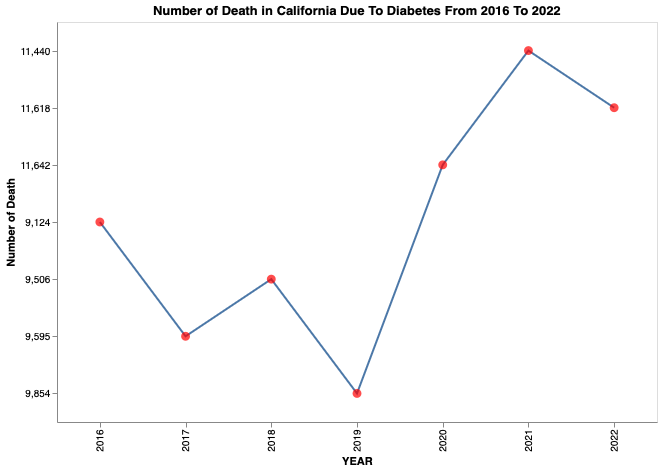

In [4]:
# If you are reviewing the following visualization through Jupyter Notebook, 
# when you hover the mouse over the highlighted points, 
# you should be able to see more detailed information regarding each year.

death_trend_in_cali = alt.Chart(california).mark_line().encode(
    alt.X('YEAR:O'),
    alt.Y('DEATHS', title = 'Number of Death')
).properties(
    title = 'Number of Death in California Due To Diabetes From 2016 To 2022',
    width = 600,
    height = 400
)

specific_points = alt.Chart(california).mark_point(
    size = 80, 
    filled= True,  
    color = 'red'  
).encode(
    alt.X('YEAR:O'),
    alt.Y('DEATHS'),
    alt.Tooltip(['YEAR', 'DEATHS', 'RATE'])
)

vis1 = death_trend_in_cali + specific_points
vis1

### Visualization 2: Total Hospitalization Counts in Each County of California Due to Diabetes Conditions From 2016 To 2022

- Visualization 2 and the following Visualization 3 can be viewed and compared together. In Visualization 2, we create a facet plot for each county in California. Within each subplot, we can see how different types of diabetes conditions contribute to the total number of hospitalizations in that county due to diabetes each year.
- From the plot, we see that some counties have significantly higher hospitalization counts than others, indicating potential regional disparities in diabetes burden and healthcare access. This gives insight into which county might have the highest hospitalization rate for most of the time.
- We will compute the mean hospitalization rates for each county for each year and compare them to identify potential high-burden areas.

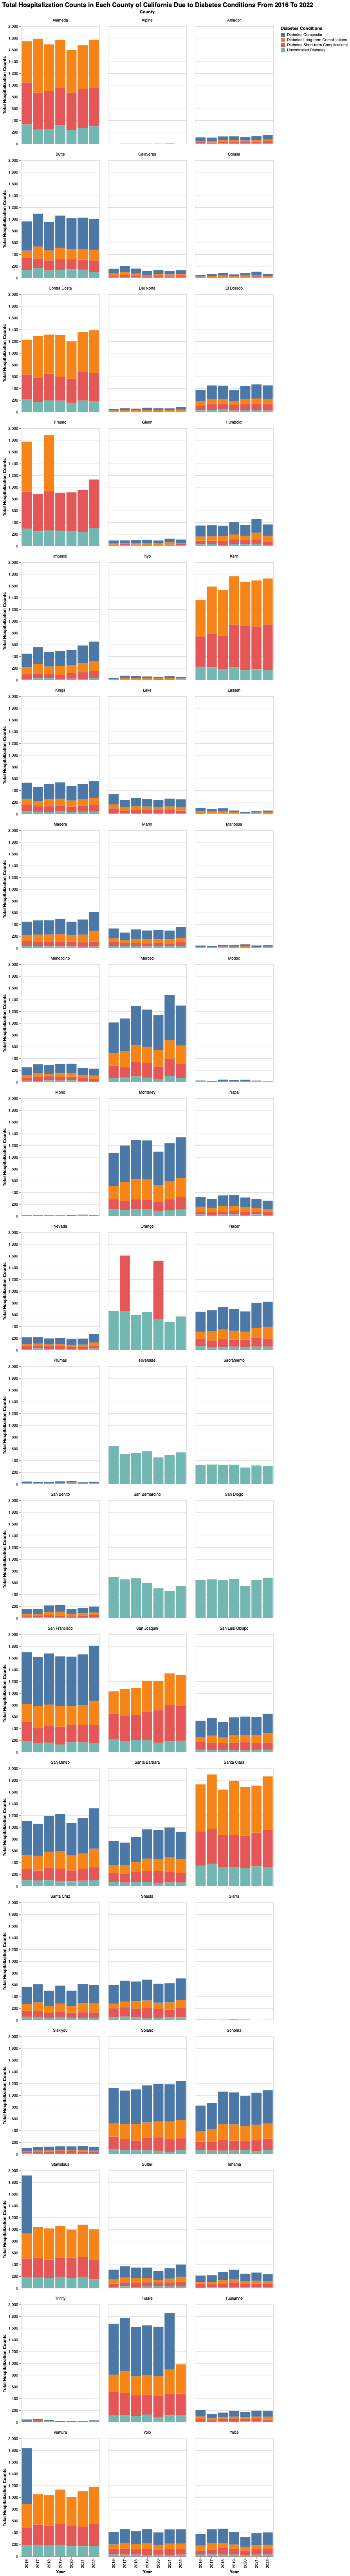

In [5]:
# When you hover your mouse over each color-segmented bar, 
# you should be able to see the count for that specific category.

vis2 = alt.Chart(counties).mark_bar().encode(
    alt.X('Year:O'),
    alt.Y('sum(Count_ICD10):Q', title = 'Total Hospitalization Counts'),
    alt.Color('PQIDescription:N', title = 'Diabetes Conditions'),
    tooltip=['Year', 'PQIDescription', 'Count_ICD10']
).properties(
    width = 200
).facet(
    facet = 'County',
    columns = 3
).properties(
    title = 'Total Hospitalization Counts in Each County of California Due to Diabetes Conditions From 2016 To 2022'
).configure_title(
    fontSize = 16
)

vis2

### Visualization 3: Comparing the Trends in Total Hospitalization Counts for Diabetes Conditions in Each County of California from 2016 to 2022 

- This visualization is actually complementary to Visualization 2. Now, we are comparing how the total hospitalization counts change over time across different counties.
- This one is optional. We put it here for our own convenience.

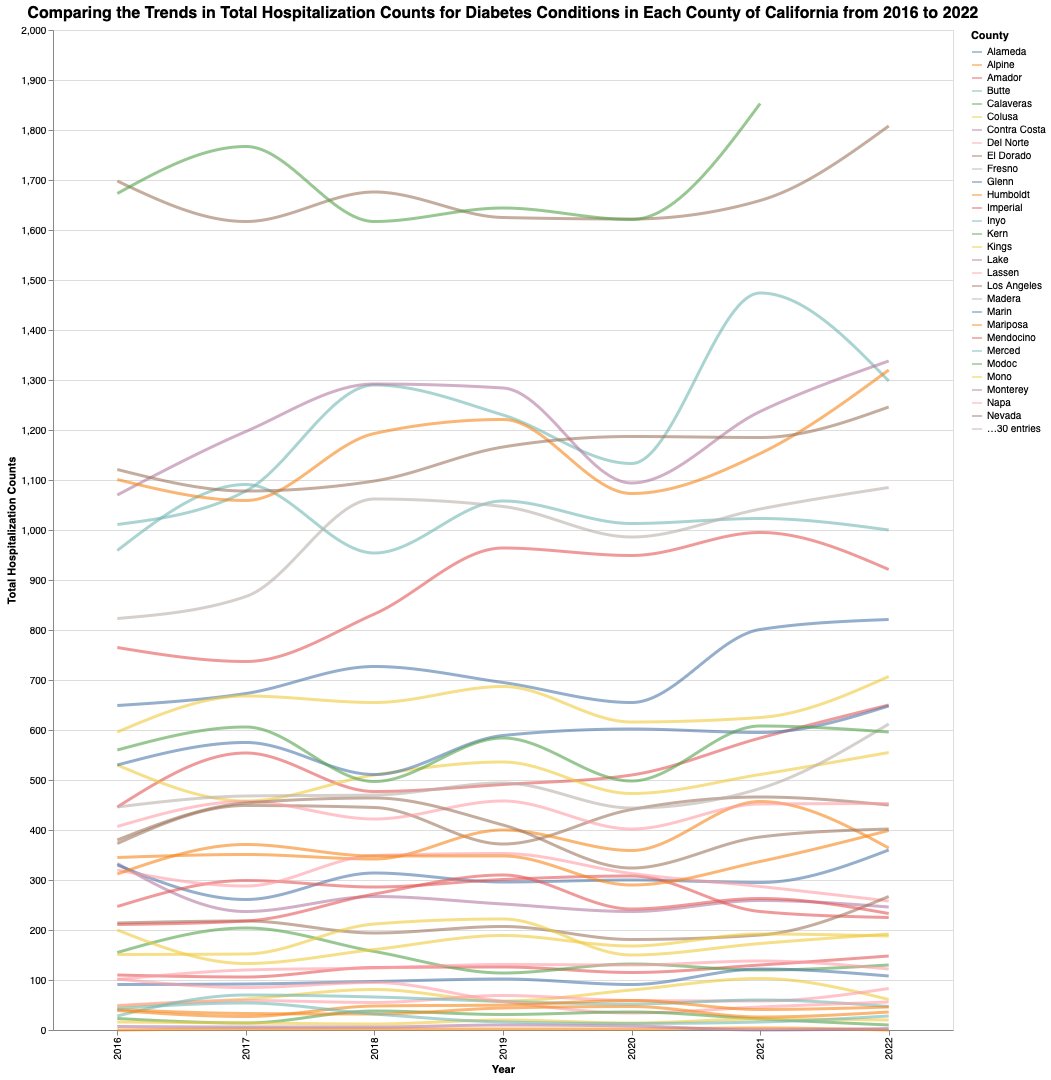

In [6]:
# Again, you can hover your mouse over a specific year point on the line to view the detailed information.

vis3 = alt.Chart(counties).mark_line(
    strokeWidth = 3,
    opacity = 0.6,
    interpolate='monotone'
).encode(
    alt.X('Year:O'),
    alt.Y('sum(Count_ICD10):Q', title = 'Total Hospitalization Counts'),
    alt.Color('County'),
    alt.Tooltip(['Year', 'County', 'sum(Count_ICD10)'])
).properties(
    title = 'Comparing the Trends in Total Hospitalization Counts for Diabetes Conditions in Each County of California from 2016 to 2022',
    width = 900,
    height = 1000
).configure_title(
    fontSize = 16
)

vis3